In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import streamlit as st


In [4]:
train_data = pd.read_csv("dataset/train.csv")
test_data = pd.read_csv("dataset/test.csv")

In [5]:

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5699 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5697 non-null   object 
 6   Hepatomegaly   5693 non-null   object 
 7   Spiders        5689 non-null   object 
 8   Edema          9999 non-null   object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4467 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5627 non-null   float64
 13  Alk_Phos       5689 non-null   float64
 14  SGOT           5688 non-null   float64
 15  Tryglicerides  4439 non-null   float64
 16  Platelets      9627 non-null   float64
 17  Prothrombin    9982 non-null   float64
 18  Stage  

In [4]:
train_data.shape()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8366 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8371 non-null   object 
 6   Hepatomegaly   8365 non-null   object 
 7   Spiders        8362 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6474 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8285 non-null   float64
 13  Alk_Phos       8365 non-null   float64
 14  SGOT           8363 non-null   float64
 15  Tryglicerides  6431 non-null   float64
 16  Platelets      14437 non-null  float64
 17  Prothrombin    14980 non-null  float64
 18  Stage 

In [5]:
train_data.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6474.000000,15000.000000,8285.000000,8365.000000,8363.000000,6431.000000,14437.000000,14980.000000,15000.000000
mean,7499.500000,1973.645867,19306.519000,1.883317,326.293482,3.522011,74.518540,1688.925828,107.464503,110.862541,253.385745,10.629586,3.032267
std,4330.271354,1390.908744,3655.099955,2.821023,170.208163,0.372347,72.482243,1895.802685,86.258878,50.466777,93.338520,0.725510,0.882616
min,0.000000,3.000000,1223.000000,0.300000,33.000000,1.960000,4.000000,3.150000,0.900000,11.000000,31.000000,9.000000,1.000000
25%,3749.750000,1092.000000,16688.000000,0.600000,242.000000,3.290000,31.000000,722.000000,71.000000,80.000000,182.000000,10.100000,2.000000
50%,7499.500000,1785.000000,19567.000000,0.900000,280.000000,3.580000,52.000000,1074.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2635.000000,22514.000000,1.800000,364.000000,3.770000,86.000000,1718.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,25598.000000,43095.000000,28.000000,2168.000000,4.640000,588.000000,18993.400000,6456.200000,598.000000,790.000000,18.000000,4.000000


In [6]:
print(test_data)

         id  N_Days             Drug      Age Sex Ascites Hepatomegaly  \
0     15000  2055.0  D-penicillamine  20891.0   F       N            Y   
1     15001  4427.0  D-penicillamine  17947.0   F       N            Y   
2     15002  3157.0              NaN  15706.0   F     NaN          NaN   
3     15003  2574.0          Placebo  17512.0   F       N            Y   
4     15004  3762.0          Placebo  19358.0   M       Y            Y   
...     ...     ...              ...      ...  ..     ...          ...   
9995  24995  3021.0              NaN  21185.0   F     NaN          NaN   
9996  24996  1037.0              NaN  18993.0   F     NaN          NaN   
9997  24997   904.0  D-penicillamine  22388.0   F       N            N   
9998  24998  1447.0          Placebo  17841.0   M       N            N   
9999  24999  1055.0              NaN  21915.0   F     NaN          NaN   

     Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos   SGOT  \
0          N     N        0.6  

In [7]:
print(train_data)

          id  N_Days             Drug      Age Sex Ascites Hepatomegaly  \
0          0  1769.0  D-penicillamine  14899.0   F       N            N   
1          1   708.0              NaN  22280.0   F     NaN          NaN   
2          2  2149.0              NaN  16467.0   F     NaN          NaN   
3          3  1925.0              NaN  19358.0   F     NaN          NaN   
4          4  1462.0              NaN  24472.0   F     NaN          NaN   
...      ...     ...              ...      ...  ..     ...          ...   
14995  14995   778.0              NaN  23376.0   F     NaN          NaN   
14996  14996   388.0  D-penicillamine  25899.0   F       Y            Y   
14997  14997  1300.0  D-penicillamine  25772.0   F       N            N   
14998  14998  2202.0              NaN  23376.0   F     NaN          NaN   
14999  14999   877.0  D-penicillamine  22388.0   F       N            N   

      Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos  \
0           N     N      

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         10000 non-null  float64
 2   Drug           5699 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5697 non-null   object 
 6   Hepatomegaly   5693 non-null   object 
 7   Spiders        5689 non-null   object 
 8   Edema          9999 non-null   object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4467 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5627 non-null   float64
 13  Alk_Phos       5689 non-null   float64
 14  SGOT           5688 non-null   float64
 15  Tryglicerides  4439 non-null   float64
 16  Platelets      9627 non-null   float64
 17  Prothrombin    9982 non-null   float64
 18  Stage  

In [9]:
# drop id value from the dataset because it is not providing any meaningful information

train_data = train_data.drop('id',axis=1)
test_data = test_data.drop('id',axis=1)

In [10]:
# Convert Stage column to integer and then to string if the value is not null
'''#train['Stage'] = train['Stage'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)
test['Stage'] = test['Stage'].apply(lambda x: str(int(x)) if pd.notnull(x) else x)'''

def convert_stagecol_to_integer(x):
    if pd.notnull(x):
        return str(int(x))
    return x
train_data['Stage']=train_data['Stage'].apply(convert_stagecol_to_integer)
test_data['Stage']=test_data['Stage'].apply(convert_stagecol_to_integer)


### Data Visualization

### Univariate Analysis on categorical coloumn

In [11]:
import seaborn as sn
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
sn.set(style="darkgrid")

def plot_categorical(data, features, hue=None):
    n_col= 2
    # Calculate the number of rows required based on number of features and columns
    n_rows = (len(features)+1)//n_col
    fig, axes = plt.subplots(n_rows, n_col, figsize=(16, 4 * n_rows))
    axes = axes.flatten()

    # Loop through each feature and plot
    for i, feature in enumerate(features):
        sn.countplot(data=data,x=feature, ax=axes[i],palette='Paired')
        # Annotate the count value on top of each bar
        for p in axes[i].patches:
            axes[i].annotate(f'{p.get_height():.0f}', 
                             (p.get_x() + p.get_width() / 2, p.get_height()), 
                             ha='center', va='center', size=12, xytext=(0, 5), textcoords='offset points')

        # Set the title and labels
        axes[i].set_title(feature)
        axes[i].set_ylabel('Count')

    # Remove empty subplots if the number of features is odd
    if len(features) % 2 != 0:
        fig.delaxes(axes[-1])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()




In [12]:
# Create lists for categorical and numeric columns
cat_cols = []
num_features = []

for column in train_data.columns:
    if pd.api.types.is_numeric_dtype(train_data[column]):
        num_features.append(column)
    elif pd.api.types.is_object_dtype(train_data[column]):
        cat_cols.append(column)

print(f'Categorical columns: {len(cat_cols)}', cat_cols)
print(f'Numeric columns: {len(num_features)}', num_features)

Categorical columns: 8 ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage', 'Status']
Numeric columns: 11 ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


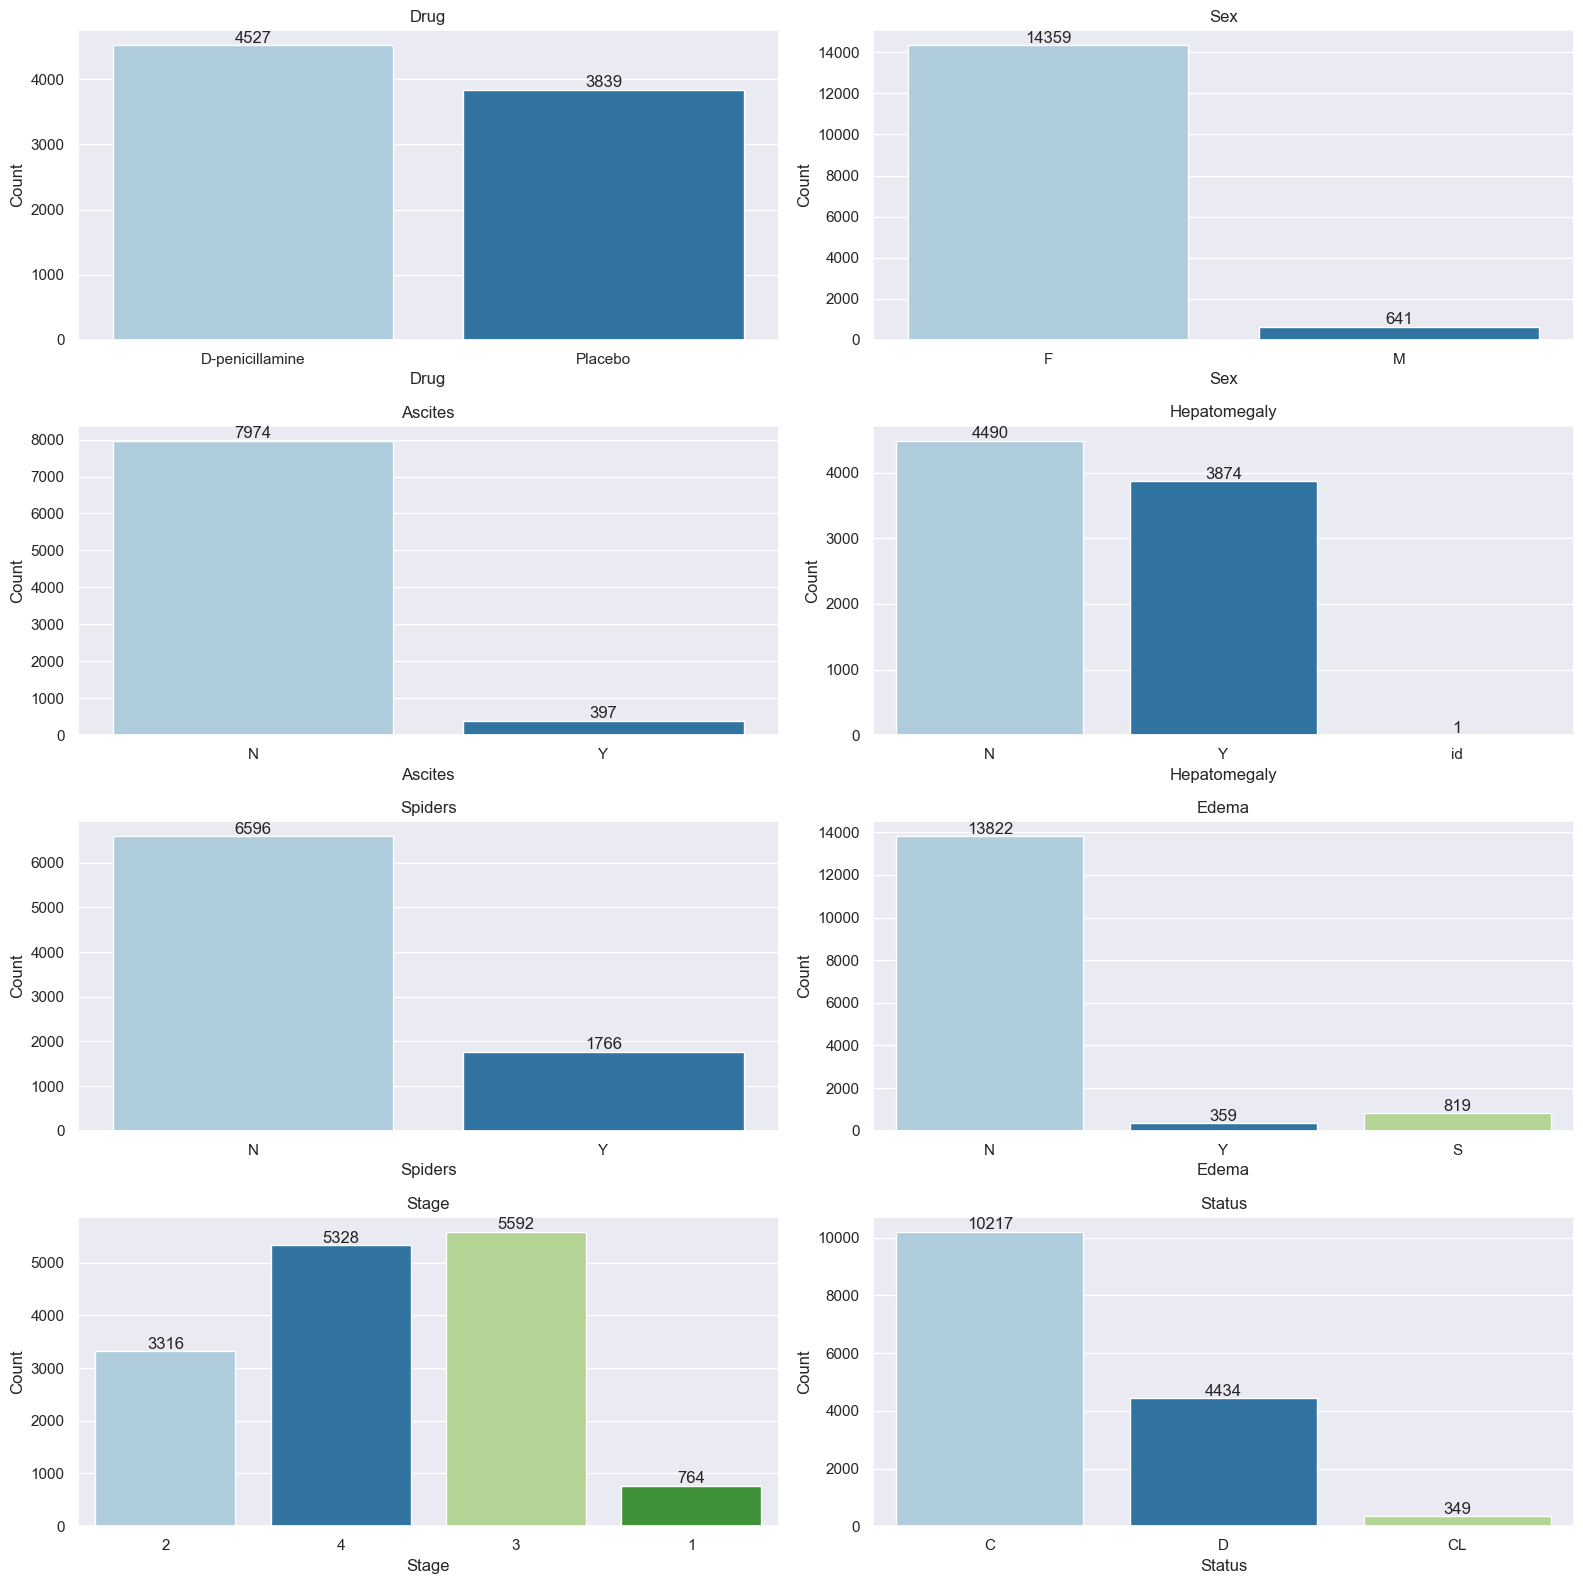

In [13]:
plot_categorical(train_data,cat_cols)

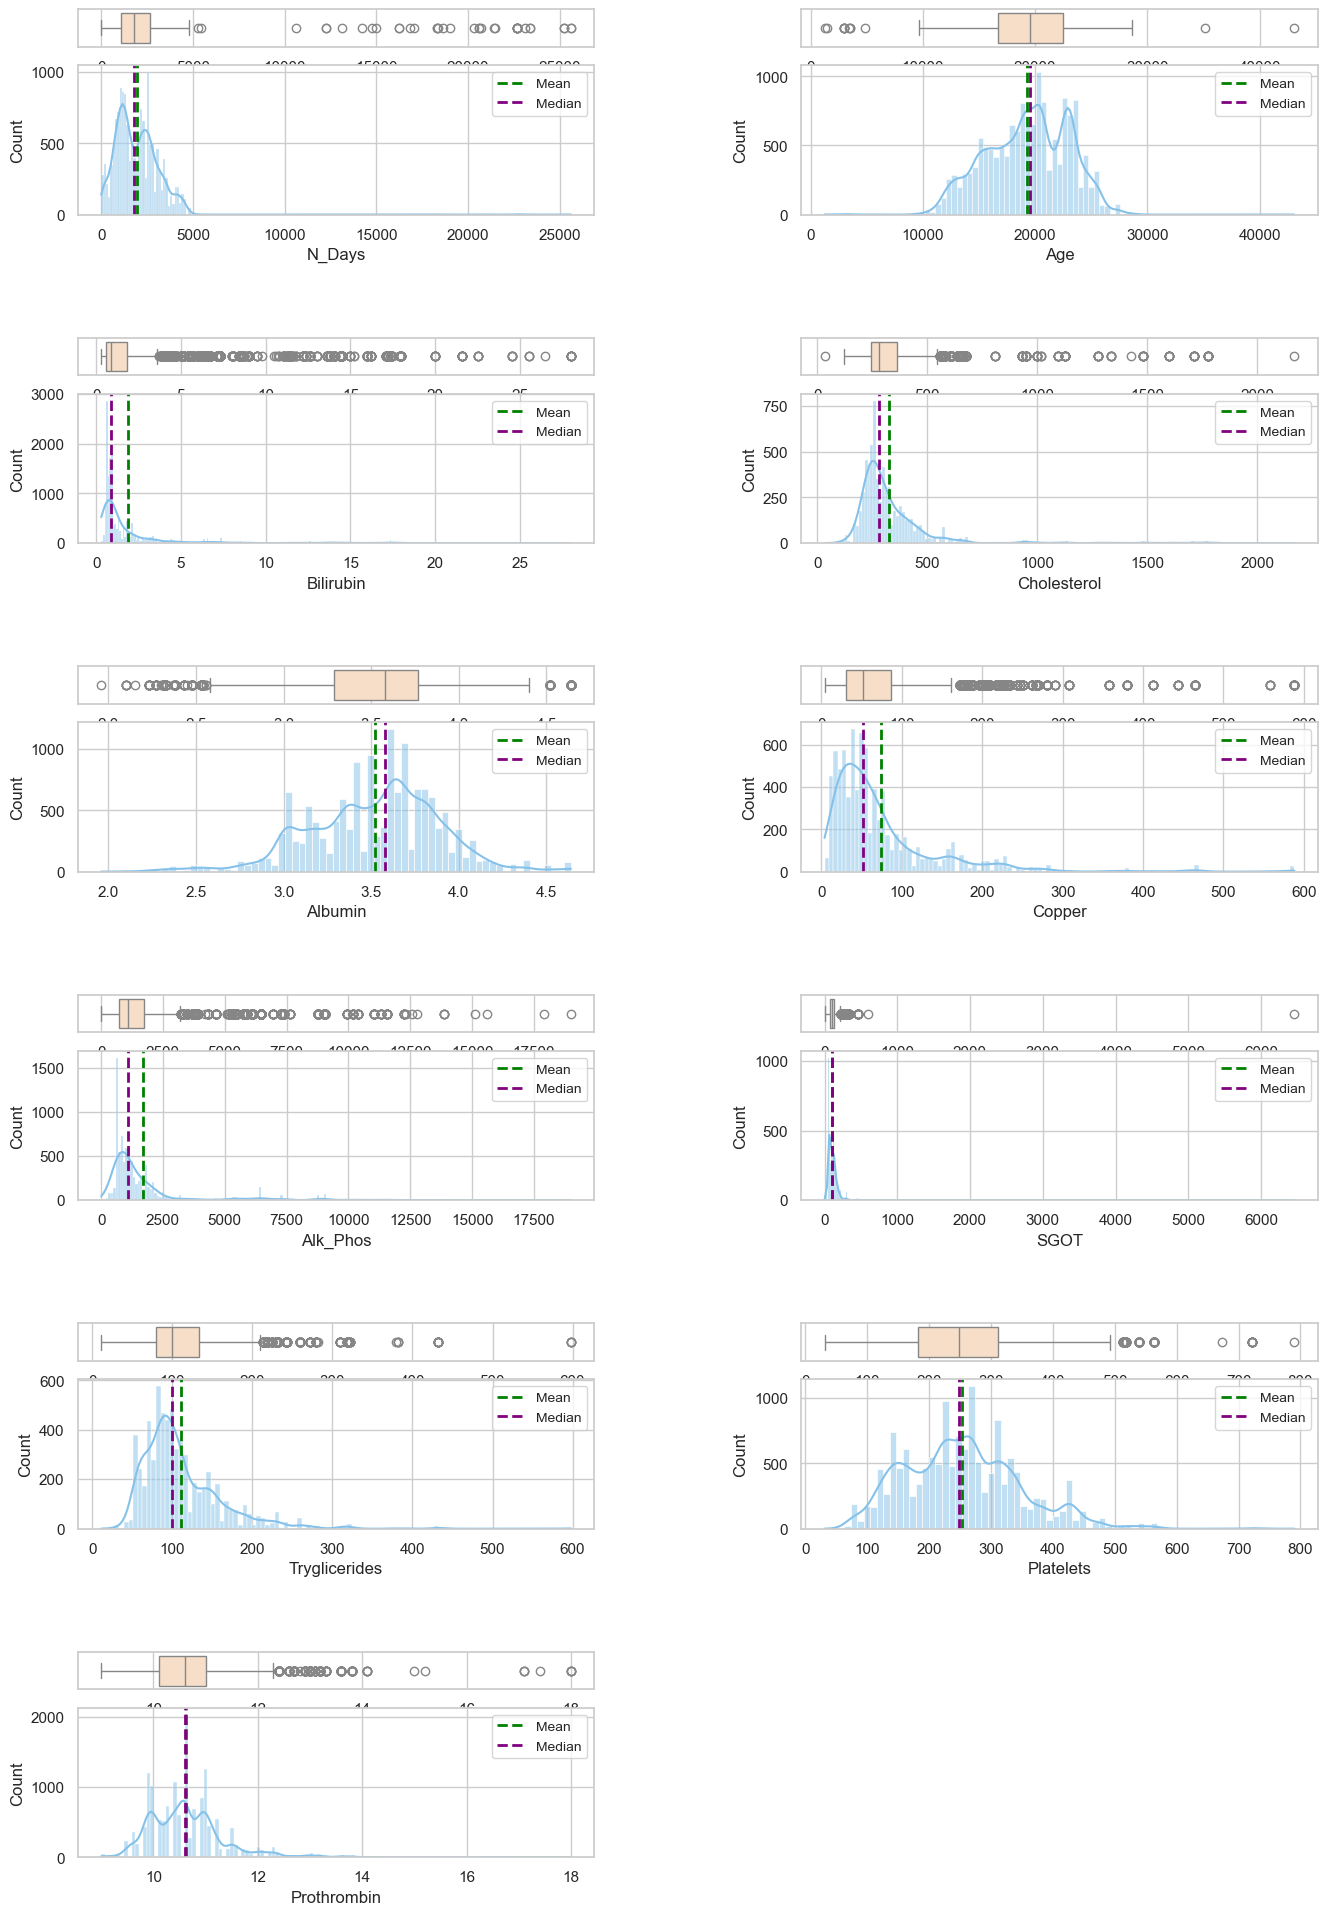

In [14]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")

def dist_plot(data, features):
    """
    Visualizes distributions of numerical features with box plots and histograms.
    Displays mean, median, skewness, and kurtosis on the plots.

    Parameters:
    - data (DataFrame): The dataset.
    - features (list): List of numerical features to visualize.
    """
    n_cols = 2  # Number of subplots per row
    n_rows = -(-len(features) // n_cols)  # Ceiling division for rows

    fig = plt.figure(figsize=(16, 4 * n_rows))
    outer = gridspec.GridSpec(n_rows, n_cols, wspace=0.4, hspace=0.6)  # Adjusted spacing

    for i, feature in enumerate(features):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], height_ratios=(0.2, 0.8))

        # Box plot
        ax_box = plt.Subplot(fig, inner[0])
        sns.boxplot(data=data, x=feature, color='#FFDDC1', ax=ax_box)  # Soft orange
        ax_box.set_xlabel('')
        fig.add_subplot(ax_box)

        # Histogram
        ax_hist = plt.Subplot(fig, inner[1])
        sns.histplot(data=data, x=feature, kde=True, color='#85C1E9', ax=ax_hist)  # Soft blue
        mean_val = data[feature].mean()
        median_val = data[feature].median()

        # Add mean and median lines
        ax_hist.axvline(mean_val, color='green', linestyle='--', linewidth=2, label='Mean')
        ax_hist.axvline(median_val, color='purple', linestyle='--', linewidth=2, label='Median')
        ax_hist.legend(loc='upper right', fontsize=10)

        
        
        fig.add_subplot(ax_hist)

    plt.tight_layout()  # Automatically adjusts subplots to fit into figure area
    plt.show()

# Example Usage:
# dist_plot(dataframe, ['feature1', 'feature2', 'feature3'])


dist_plot(train_data, num_features)


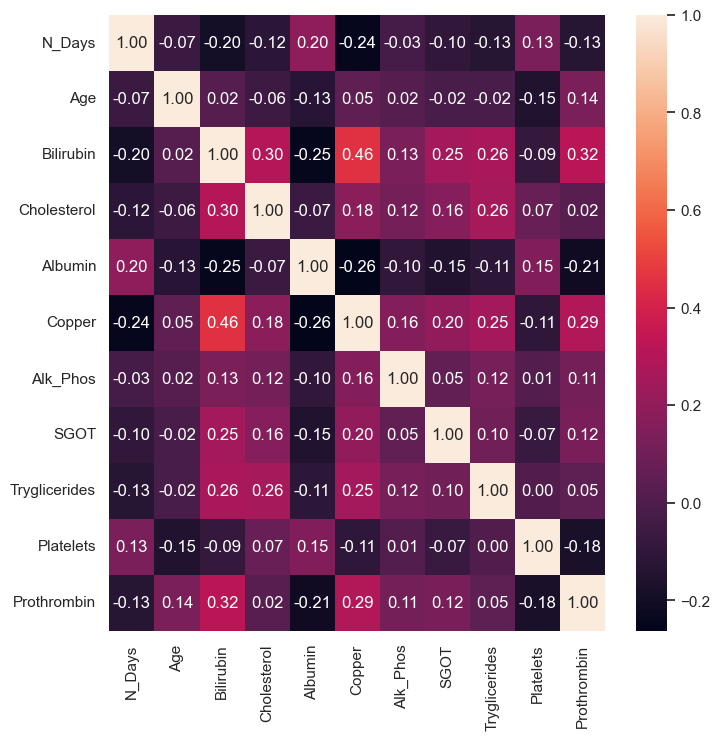

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [16]:
### Remove N_Days column from both train and test
train_data = train_data.drop('N_Days', axis=1)
test_data = test_data.drop('N_Days', axis=1)

In [17]:
### Replace id value in Hepatomegaly column with less frequent value of this column
# aik id ki value thi is feature ma wo remove ki
train_data['Hepatomegaly'] = train_data['Hepatomegaly'].replace('id', 'N')
test_data['Hepatomegaly'] = test_data['Hepatomegaly'].replace('id', 'N')

### Handling Missing Values of numerical coloumn

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

num_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
            'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

#Creates an instance of IterativeImputer:
iter_imputer = IterativeImputer(max_iter=20, random_state=0)

# Makes copies of the training and testing datasets to apply the imputation without modifying the originals.
train_iter_imputed = train_data.copy()
test_iter_imputed = test_data.copy()


#  Applying the Imputation
train_iter_imputed[num_features] = iter_imputer.fit_transform(train_data[num_features])
test_iter_imputed[num_features] = iter_imputer.transform(test_data[num_features])

train_data[num_features] = train_iter_imputed[num_features]
test_data[num_features] = test_iter_imputed[num_features]

### using z-score

In [19]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

num_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
            'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
# 2. Handle Outliers Using Robust Z-Score Method
def robust_z_score(df, threshold=3):
    z_scores = np.abs((df - df.median()) / (1.4826 * (np.abs(df - df.median()).median())))
    return z_scores < threshold

mask_robust_z = robust_z_score(train_data[num_features])
mask_robust_z = mask_robust_z.all(axis=1)

train_robust_z_imputed = train_data.copy()
train_robust_z_imputed = train_robust_z_imputed[mask_robust_z]
mask_robust_z = robust_z_score(test_data[num_features])
mask_robust_z = mask_robust_z.all(axis=1)

test_robust_z_imputed = test_data.copy()
test_robust_z_imputed = test_robust_z_imputed[mask_robust_z]

test_robust_z_imputed = test_data.copy()
test_robust_z_imputed = test_robust_z_imputed[mask_robust_z]
train = train_robust_z_imputed
test = test_robust_z_imputed
train.shape, test.shape

((8670, 18), (5783, 17))

In [20]:
train.shape, test.shape


((8670, 18), (5783, 17))

### Handling Missing Values of categorical coloumn

In [21]:
import pandas as pd
import numpy as np

#list of columns that need to be processed when handling missing data.
cat_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']
output_col = 'Status'

#start a loop to process each categorical coloumn
for col in cat_cols:
# Get the distribution of values (how many times each value appears)
    prop = train[col].value_counts(normalize=True)

# Create an empty list to store values that we will use to fill missing values
    fill_values = []
    for value, count in prop.items():
        # add each value to fill_values list 
        fill_values.extend([value]* int(count * train[col].isnull().sum()))
    np.random.shuffle(fill_values)

    # If there are still missing values after filling with the random values
    if len(fill_values) < train[col].isnull().sum():
        # Fill the remaining missing values with the most frequent value in that column
        fill_values.extend([prop.idxmax()] * (train[col].isnull().sum() - len(fill_values)))
    elif len(fill_values) > train[col].isnull().sum():
        # If we have more fill values than missing values, cut it down to size
        fill_values = fill_values[:train[col].isnull().sum()]

    # Replace the missing values with the fill_values in the `train` dataframe
    train.loc[train[col].isnull(), col] = fill_values

# Handling missing values in the test dataset (same process as for train)
for col in cat_cols:
    # Calculate the proportions of each category in the column for the test dataset
    prop = test[col].value_counts(normalize=True)
    
    # Initialize a list to hold the fill values for the test dataset
    fill_values = []
    
    # Loop through the categories and their proportions to fill missing values in the test data
    for value, count in prop.items():
        # Extend the list by repeating each category based on its proportion
        fill_values.extend([value] * int(count * test[col].isnull().sum()))
    
    # Shuffle the list of fill values randomly to avoid any bias
    np.random.shuffle(fill_values)

    # Ensure the number of fill values exactly matches the number of missing values in the test dataset
    if len(fill_values) < test[col].isnull().sum():
        # If not enough fill values, add the most frequent category to make up the difference
        fill_values.extend([prop.idxmax()] * (test[col].isnull().sum() - len(fill_values)))
    elif len(fill_values) > test[col].isnull().sum():
        # If too many fill values, trim the list to match the number of missing values
        fill_values = fill_values[:test[col].isnull().sum()]

    # Assign the generated fill values to the missing positions in the test dataset
    test.loc[test[col].isnull(), col] = fill_values




In [22]:
print("Missing values after Conditional Mode Imputation:")
train[cat_cols].isnull().sum()

Missing values after Conditional Mode Imputation:


Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
Stage           0
dtype: int64

### Feature Engineering

In [23]:
# feature engg
# convert num cols to cat

# Import necessary libraries for data preprocessing
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

#The target variable (the column you're trying to predict) is named 'Status'. This is usually the dependent variable in a machine learning model.
target= 'Status'

#(values that don't have an inherent order). 
cat_cols_nominal = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
# values that have a meaningful order, 
cat_cols_ordinal = ['Stage']

#Numeerical Coloumn
num_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Convert categorical columns to string type
for col in cat_cols_nominal + cat_cols_ordinal:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)



In [24]:
# Scale numerical columns using RobustScaler
scaler = RobustScaler()
train[num_features] = scaler.fit_transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

# Encode nominal categorical columns using OneHotEncoder
nominal_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

train_nominal_encoded = nominal_encoder.fit_transform(train[cat_cols_nominal])
test_nominal_encoded = nominal_encoder.transform(test[cat_cols_nominal])


In [25]:
#performing encoding on categorical column
ordinal_encoder = OrdinalEncoder()

train_ordinal_encoder = ordinal_encoder.fit_transform(train[cat_cols_ordinal])
test_ordinal_encoder = ordinal_encoder.fit_transform(test[cat_cols_ordinal])

# Create DataFrame for encoded ordinal features
train_ordinal_df = pd.DataFrame(train_ordinal_encoder, columns=cat_cols_ordinal)
test_ordinal_df = pd.DataFrame(test_ordinal_encoder, columns=cat_cols_ordinal)

# Create DataFrame for encoded nominal features
train_nominal_df = pd.DataFrame(train_nominal_encoded, columns=nominal_encoder.get_feature_names_out(cat_cols_nominal))
test_nominal_df = pd.DataFrame(test_nominal_encoded, columns=nominal_encoder.get_feature_names_out(cat_cols_nominal))

In [26]:
train.shape, test.shape

((8670, 18), (5783, 17))

In [27]:
# Reset indices
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
# Concatenate processed numerical and categorical features
train_processed = pd.concat([train[num_features], train_nominal_df, train_ordinal_df], axis=1)
test_processed = pd.concat([test[num_features], test_nominal_df, test_ordinal_df], axis=1)

# Encode target variable
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(train[target])

In [28]:
# Handle class imbalance using SMOTE When we have a dataset where one class (like ‘yes’ or ‘no’) has much fewer examples than the others,
#this is called class imbalance. 
#It can make our model biased towards the majority class. SMOTE helps fix this by creating synthetic examples of the minority class.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_processed, y_train)

In [29]:
X_resampled.shape, y_resampled.shape, train_processed.shape, test_processed.shape

((20781, 24), (20781,), (8670, 24), (5783, 24))

In [30]:
# Save the processed data to CSV files for future use
train_processed.to_csv('train_processed.csv', index=False)
test_processed.to_csv('test_processed.csv', index=False)
np.savetxt('y_resampled.csv', y_resampled, delimiter=',')

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### SVM MODEL

In [32]:
import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score


svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf'],  # Fix missing quotation mark
    'gamma': ['scale', 'auto', 0.1],
}
# Start measuring time
start_time = datetime.datetime.now()

# SVM with GridSearchCV

svm_clf = SVC(probability=True)
svm_grid_search = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best SVM model
svm_best_model = svm_grid_search.best_estimator_
svm_best_params = svm_grid_search.best_params_
svm_best_logloss = -svm_grid_search.best_score_

# Evaluate SVM on test data
svm_y_pred = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
# End measuring time
end_time = datetime.datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time

print("SVM Results:")
print(f"Best Parameters: {svm_best_params}")  # Output the best hyperparameters found
print(f"Best Log Loss: {svm_best_logloss}")  # Output the best log loss (negative of the best score from cross-validation)
print(f"Accuracy: {svm_accuracy}")  # Output the accuracy on the test data
print(f"Total Training and Evaluation Time: {elapsed_time}")



SVM Results:
Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Log Loss: -0.8908806130850591
Accuracy: 0.9061823430358431
Total Training and Evaluation Time: 0:03:27.494813


In [33]:
svm_y_pred = svm_best_model.predict(X_test)


In [34]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy on Test Data: {svm_accuracy}")

Accuracy on Test Data: 0.9061823430358431


In [35]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report (includes precision, recall, F1 score, etc.)
report = classification_report(y_test, svm_y_pred)
print("Classification Report:")
print(report)

Confusion Matrix:
[[1112   42  204]
 [   1 1401    0]
 [ 129   14 1254]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1358
           1       0.96      1.00      0.98      1402
           2       0.86      0.90      0.88      1397

    accuracy                           0.91      4157
   macro avg       0.91      0.91      0.90      4157
weighted avg       0.91      0.91      0.91      4157



### KNN CLASSIFIER

In [36]:
from sklearn.neighbors import KNeighborsClassifier 

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy on Test Data: {knn_accuracy}")


KNN Accuracy on Test Data: 0.8917488573490499


In [44]:
# Define the parameter grid for tuning KNN
from sklearn.metrics import log_loss


knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to try
    'weights': ['uniform', 'distance'],  # 'uniform' or 'distance' weights
    'metric': ['euclidean', 'manhattan']  # Distance metric options
}
# Start measuring time
start_time = datetime.datetime.now()
# Perform grid search with cross-validation
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
knn_best_model = knn_grid_search.best_estimator_
knn_best_params = knn_grid_search.best_params_
print(f"Best KNN Parameters: {knn_best_params}")

# Evaluate the best KNN model on test data
knn_y_pred_best = knn_best_model.predict(X_test)
knn_accuracy_best = accuracy_score(y_test, knn_y_pred_best)
print(f"Best KNN Accuracy on Test Data: {knn_accuracy_best}")
# End measuring time
end_time = datetime.datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Output runtime
print(f"Total Training and Evaluation Time: {elapsed_time}")


Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Accuracy on Test Data: 0.9266297810921338
Total Training and Evaluation Time: 0:00:05.295320


In [38]:
# Get the predicted probabilities for the test set
knn_y_pred_proba = knn_model.predict_proba(X_test)

# Calculate Log Loss using the true labels (y_test) and the predicted probabilities
knn_log_loss = log_loss(y_test, knn_y_pred_proba)
print(f"Log Loss for KNN: {knn_log_loss}")


Log Loss for KNN: 1.173102300895879


### naive bayes

In [39]:
from sklearn.naive_bayes import GaussianNB


In [40]:
nave_byse_model = GaussianNB()
nave_byse_model.fit(X_train,y_train)
nb_y_pred = nave_byse_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Naive Bayes Accuracy on Test Data: {nb_accuracy}")


Naive Bayes Accuracy on Test Data: 0.4536925667548713


In [45]:
from sklearn.naive_bayes import GaussianNB

# Start measuring time
start_time = datetime.datetime.now()

# Train Naive Bayes model
nb_clf = GaussianNB(var_smoothing=1e-1)
nb_clf.fit(X_train, y_train)

# Evaluate Naive Bayes on test data
nb_y_pred = nb_clf.predict(X_test)
nb_logloss = log_loss(y_test, nb_clf.predict_proba(X_test))
nb_accuracy = accuracy_score(y_test, nb_y_pred)

# End measuring time
end_time = datetime.datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time
print("Naive Bayes Results:")
print(f"Log Loss: {nb_logloss}")
print(f"Accuracy: {nb_accuracy}")
print(f"Total Training and Evaluation Time: {elapsed_time}")


Naive Bayes Results:
Log Loss: 1.0407003769329088
Accuracy: 0.6100553283617993
Total Training and Evaluation Time: 0:00:00.017620


### Logistic model

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
# Start measuring time
start_time = datetime.datetime.now()
# Step 1: Train the Logistic Regression model
log_reg_model = LogisticRegression(multi_class='ovr', max_iter=1000)  # For multi-class, 'ovr' stands for One-vs-Rest
log_reg_model.fit(X_train, y_train)
# Step 2: Get the predicted labels for the test set
log_reg_y_pred = log_reg_model.predict(X_test)

# Step 3: Get predicted probabilities for the test set
log_reg_pred_proba = log_reg_model.predict_proba(X_test)

# Step 4: Calculate Log Loss
log_reg_log_loss = log_loss(y_test, log_reg_pred_proba)

# Step 5: Calculate Accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
# End measuring time
end_time = datetime.datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time

# Step 6: Output the results
print(f"Log Loss for Logistic Regression: {log_reg_log_loss}")
print(f"Accuracy for Logistic Regression: {log_reg_accuracy}")
print(f"Total Training and Evaluation Time: {elapsed_time}")


Log Loss for Logistic Regression: 0.7950017261162557
Accuracy for Logistic Regression: 0.6656242482559538
Total Training and Evaluation Time: 0:00:00.110411


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
# Start measuring time
start_time = datetime.datetime.now()
rf_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    # accuracy 93
}

# Random Forest with GridSearchCV
rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best Random Forest model
rf_best_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_
rf_best_logloss = -rf_grid_search.best_score_

# Evaluate Random Forest on test data
rf_y_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
# End measuring time
end_time = datetime.datetime.now()

# Calculate elapsed time
elapsed_time = end_time - start_time
print("Random Forest Results:")
print(f"Best Parameters: {rf_best_params}")
print(f"Best Log Loss: {rf_best_logloss}")
print(f"Accuracy: {rf_accuracy}")
print(f"Total Training and Evaluation Time: {elapsed_time}")


Random Forest Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Log Loss: 0.26582832716526894
Accuracy: 0.9357709886937695
Total Training and Evaluation Time: 0:00:41.205069


## ANONA ANALYSIS ON EXECUTION TIME

- SVM:  Total Training and Evaluation Time: 0:03:27.494813
- KNN: Total Training and Evaluation Time: 0:00:05.295320
- NAIVE BAYES: Total Training and Evaluation Time: 0:00:00.017620
- Logistic Regression : Total Training and Evaluation Time: 0:00:00.110411
- Random forest : Total Training and Evaluation Time: 0:00:41.205069

In [58]:
import scipy.stats as stats
import numpy as np

# Let's assume you have the training times for each model in seconds
model_names = ['KNN', 'SVM', 'Naive Bayes', 'Logistic Regression', 'Random Forest']

# Example training times in seconds (replace these with your actual times)
training_times = {
    'SVM': [207.49, 210.3, 209.4, 208.1],  #  multiple measurements for KNN
    'KNN': [5.29, 5.5, 5.0, 5.2],          #  multiple measurements for SVM
    'Naive Bayes': [0.0176, 0.018, 0.0175],  #  multiple measurements for Naive Bayes
    'Logistic Regression': [0.1104, 0.111, 0.109],  #  multiple measurements
    'Random Forest': [41.20, 42.5, 41.0, 40.8]  #  multiple measurements
}

# Perform ANOVA on the training times
data = [training_times['KNN'], training_times['SVM'], training_times['Naive Bayes'], 
        training_times['Logistic Regression'], training_times['Random Forest']]

f_statistic, p_value = stats.f_oneway(*data)

# Output the result
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis because There is a significant difference in the training times of the models.")
else:
    print("Not Reject the null hypothesis There is no significant difference in the training times of the models.")


F-statistic: 59733.95674845088
P-value: 1.434467478711766e-27
Reject the null hypothesis because There is a significant difference in the training times of the models.


### Log loss

           Model Log Loss
0  Random Forest    0.267
1            SVM   0.3054
3             LR    0.795
2             NB    1.036
4           knn3    1.407


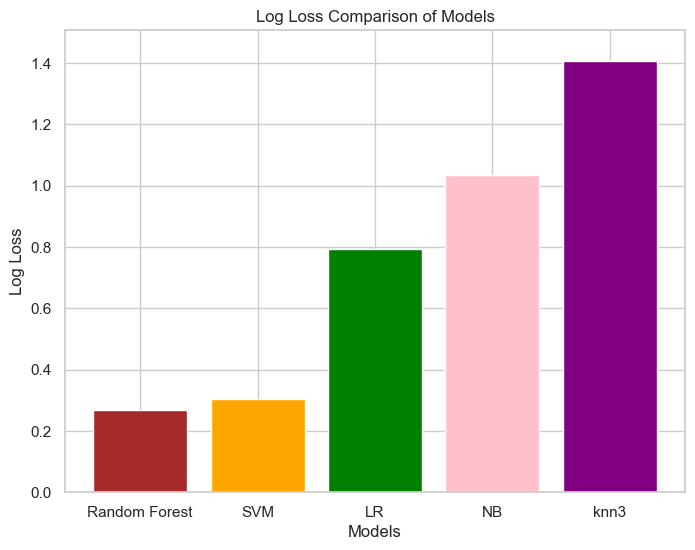

In [69]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'SVM', 'NB', 'LR', 'knn3'],
    'Log Loss': ['0.267', '0.3054', '1.036','0.795','1.407']
})

# Sort by Log Loss (ascending order)
results = results.sort_values(by='Log Loss', ascending=True)

print(results)
import matplotlib.pyplot as plt
# Ensure 'Log Loss' column is numeric
results['Log Loss'] = pd.to_numeric(results['Log Loss'])

# Bar plot for comparison with y-axis starting at zero
plt.figure(figsize=(8, 6))
plt.bar(results['Model'], results['Log Loss'], color=['brown', 'orange', 'green','pink','purple'])
plt.title('Log Loss Comparison of Models')
plt.ylabel('Log Loss')
plt.xlabel('Models')
plt.ylim(0, results['Log Loss'].max() + 0.1)  # Start at 0, adjust upper limit slightly
plt.show()


In [ ]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)
